# YouTube trending videos

In [65]:
import numpy as np
from numpy import nan
nan
import pandas as pd
from matplotlib import pyplot as plt

from helpers.files import load_csv

numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day", "publish_time"
]


## Etap 5 - Zbieranie danych nie-trending

### Skrypt do zbierania danych trending

Pierwszym krokiem, który został wykonany w ramach tego etapu było
zapoznanie się z oryginalnym skryptem do pobierania danych „trending".
Skrypt jest dostępny w repozytorium [Trending-Youtube-Scraper](https://github.com/mitchelljy/Trending-YouTube-Scraper).

Oryginalny skrypt do pobierania danych -> w jego
kontekscie można opisać dlaczego tak pobieramy

### Pomysł na pobranie danych nie trending

- Podział okresu 11.2017-07.2018 na 4 podokresy
- Zbieranie danych „proporcjami” wystąpień kategorii podobnymi do oryginalnych
- Filtrowanie filmów trending
- Filtrowanie ewentualnych powtórzeń
- Uzupełnianie statystyk

Testowe dane

### Wczytanie danych trending

In [66]:
gb_videos, us_videos = load_csv("ped3_data")
trending_videos = pd.concat([gb_videos, us_videos])

for name in numeric_attrs:
    trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[0] if eval(x) else np.nan)



### Wczytanie danych nie trending

In [67]:
gb_non_videos, us_non_videos = load_csv("ped5_full_data")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos])
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

### Atrybuty liczbowe

**Funkcja do rysowania wykresów**

In [68]:
def plot_numeric_attr(attr_name: str, trending: pd.DataFrame, non_trending: pd.DataFrame) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
    axes[0, 0].hist(trending[attr_name])
    axes[0, 0].title.set_text(f"Trending: {attr_name}")
    axes[0, 1].hist(non_trending[attr_name])
    axes[0, 1].title.set_text(f"Non Trending: {attr_name}")
    axes[1, 0].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"]
    )
    axes[1, 1].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"],
        showfliers=False
    )

**Views**

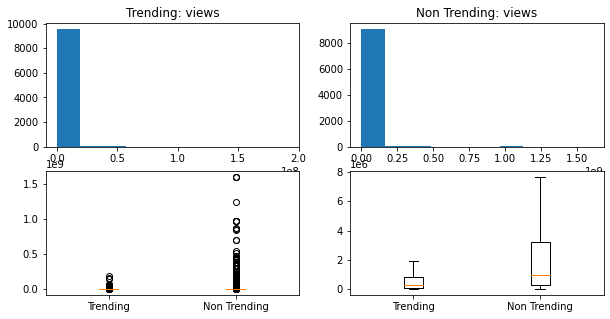

In [69]:
plot_numeric_attr("views", trending_videos, non_trending_videos)

**Likes**

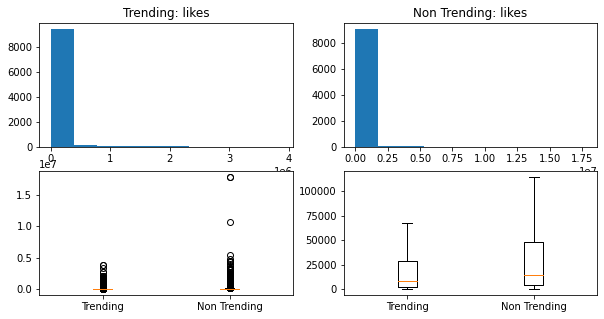

In [70]:
plot_numeric_attr("likes", trending_videos, non_trending_videos)

**Dislikes**

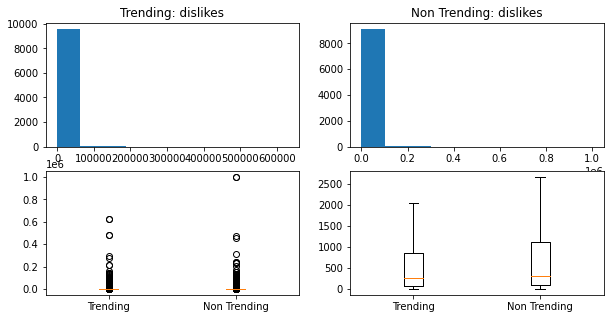

In [71]:
plot_numeric_attr("dislikes", trending_videos, non_trending_videos)

**Comment Count**

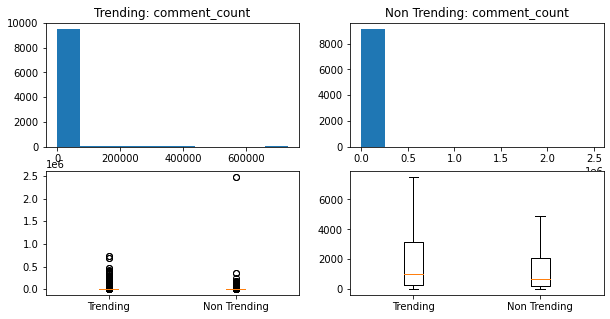

In [72]:
plot_numeric_attr("comment_count", trending_videos, non_trending_videos)

**Description length**

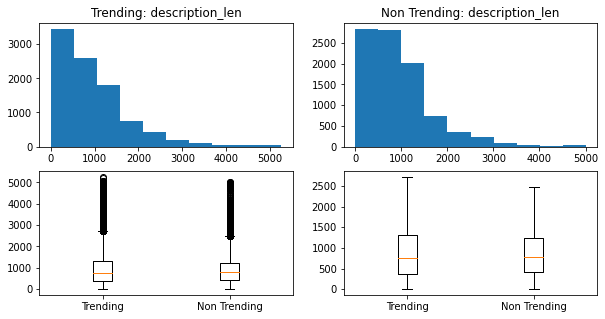

In [73]:
plot_numeric_attr("description_len", trending_videos, non_trending_videos)

**Title length**

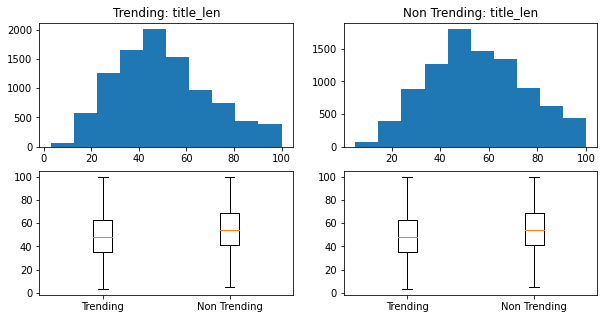

In [74]:
plot_numeric_attr("title_len", trending_videos, non_trending_videos)

**Channel title length**

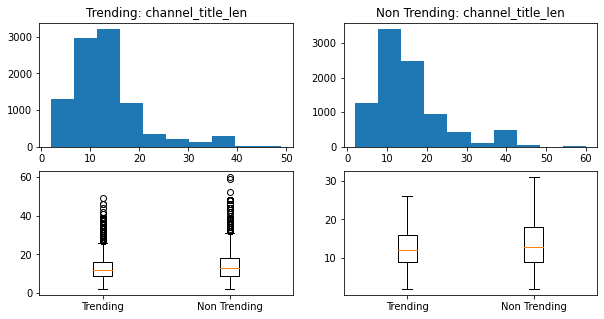

In [75]:
plot_numeric_attr("channel_title_len", trending_videos, non_trending_videos)


### Atrybuty czasowe

**Dzień opublikowania filmu**

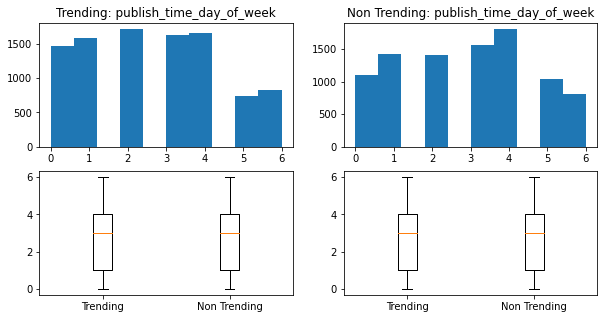

In [76]:
plot_numeric_attr("publish_time_day_of_week", trending_videos, non_trending_videos,)

**Godzina opublikowania filmu**

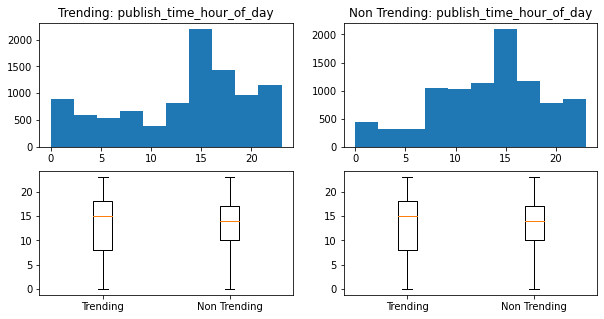

In [77]:
plot_numeric_attr("publish_time_hour_of_day", trending_videos, non_trending_videos)

**Data publikacji**

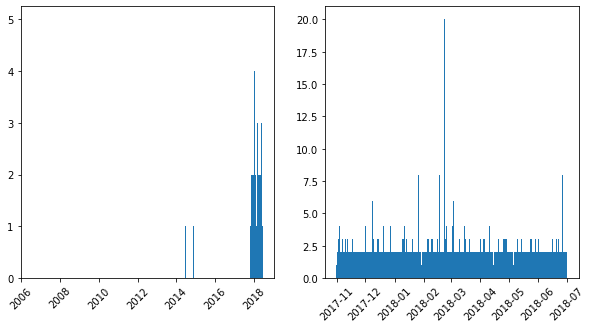

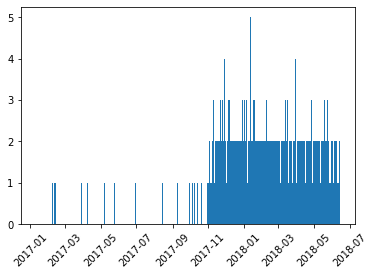

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

trending_publish_time_counts = pd.to_datetime(trending_videos["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ").value_counts()
trending_publish_time_counts = trending_publish_time_counts.rename_axis("publish_time").reset_index(name="count")

publish_times = pd.to_datetime(trending_videos["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
filtered = publish_times[publish_times >= "2017-01-01"]
filtered_counts = filtered.value_counts().rename_axis("publish_time").reset_index(name="count")


non_trending_publish_time_counts = pd.to_datetime(non_trending_videos["publish_time"], format="%Y-%m-%dT%H:%M:%SZ").value_counts()
non_trending_publish_time_counts = non_trending_publish_time_counts.rename_axis("publish_time").reset_index(name="count")

axes[0].bar(pd.to_datetime(trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"), trending_publish_time_counts["count"])
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].bar(pd.to_datetime(non_trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%SZ"), non_trending_publish_time_counts["count"])
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
plt.show()

plt.bar(pd.to_datetime(filtered_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"), filtered_counts["count"])
plt.xticks(rotation=45)
plt.show()

### Atrybuty tekstowe